In [1]:
import pandas as pd

In [2]:
canciones_total = pd.read_csv('canciones_total.csv')
canciones_total.head()

,name,emociones_vector,valence,valence_musical,artists,vector_ponderado,emocion_label,tag,language
0,!,[0.6331253 0.01453238 0.00103653 0.34332654 0...,-0.477221,0.193,HELLYEAH,"[0.4431877, 0.01017267, 0.00072557, 0.24032858...",amargura,rock,en
1,!!,[2.6988293e-04 9.9881661e-01 3.2707513e-04 1.5...,-0.764665,0.287,Yxngxr1,"[0.00018891806, 0.6991716, 0.00022895259, 0.00...",alegría,rock,en
2,!!Noble Stabbings!!,[9.9117917e-01 1.5806471e-03 6.1255234e-04 6.2...,-0.616038,0.349,Dillinger Four,"[0.69382542, 0.0011064529, 0.00042878662, 0.00...",tristeza,pop,en
3,!I'll Be Back!,[9.9591941e-01 1.4687716e-03 1.1341516e-03 1.0...,-0.672992,0.688,Rilès,"[0.69714355, 0.0010281401, 0.0007939061, 0.000...",tristeza,rock,en
4,!Lost!,[9.9823904e-01 4.4585887e-04 1.6341315e-04 6.7...,0.427209,0.380,Rilès,"[0.6987673, 0.00031210121, 0.0001143892, 0.000...",tristeza,pop,en


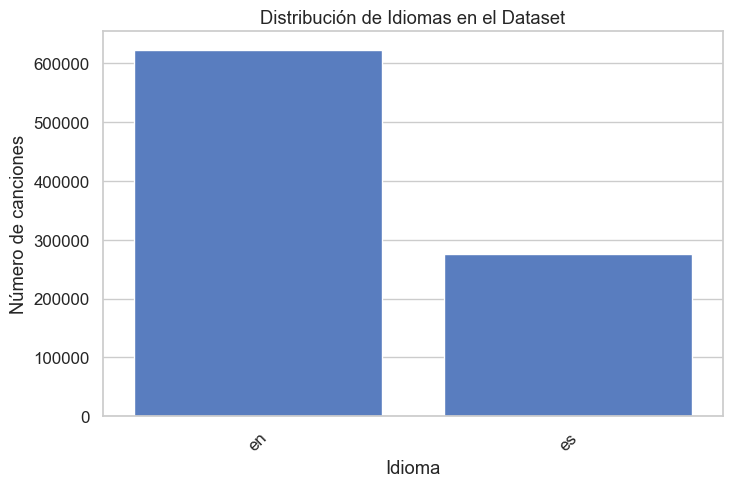

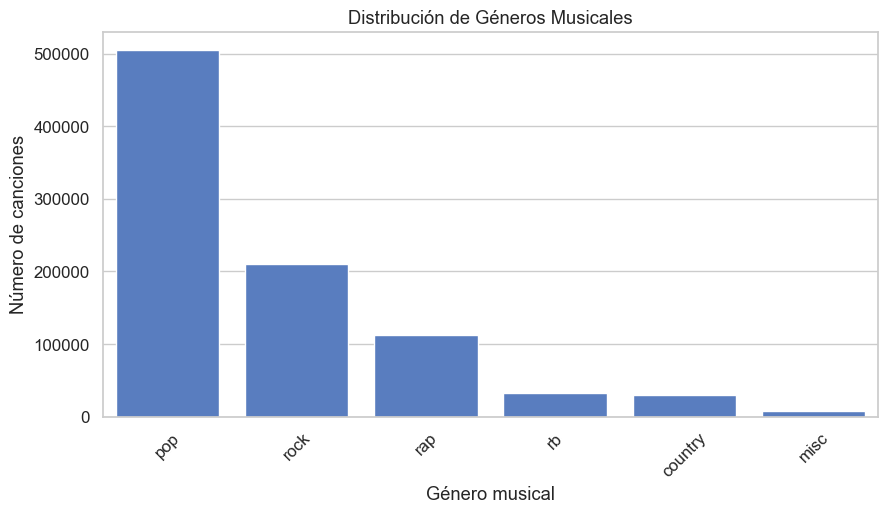

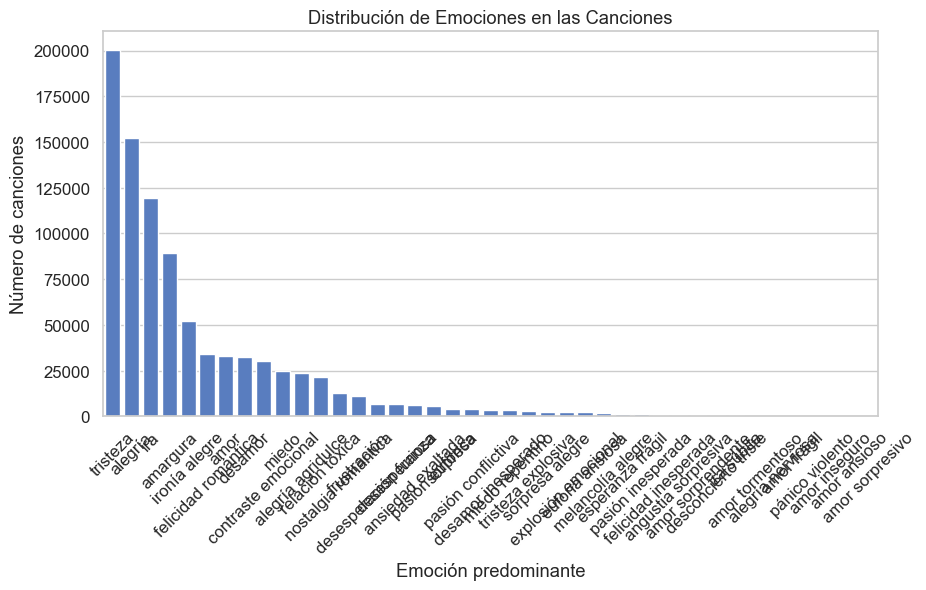

🔤 Distribución de idiomas:
language
en    0.69
es    0.31
Name: proportion, dtype: float64

🎸 Distribución de géneros:
tag
pop        0.56
rock       0.23
rap        0.13
rb         0.04
country    0.03
misc       0.01
Name: proportion, dtype: float64

🎭 Distribución de emociones:
emocion_label
tristeza                 0.22
alegría                  0.17
ira                      0.13
amargura                 0.10
ironía alegre            0.06
felicidad romántica      0.04
amor                     0.04
desamor                  0.04
contraste emocional      0.03
miedo                    0.03
alegría agridulce        0.03
relación tóxica          0.02
nostalgia romántica      0.01
frustración              0.01
desesperación furiosa    0.01
desesperanza             0.01
ansiedad exaltada        0.01
pasión eufórica          0.01
sorpresa                 0.00
pasión conflictiva       0.00
desamor inesperado       0.00
miedo repentino          0.00
tristeza explosiva       0.00
sorpresa alegr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Si no lo has cargado todavía:
# canciones_total = pd.read_csv("canciones_total.csv")

# ================================
# 📊 1. Distribución de idiomas
# ================================
plt.figure(figsize=(8,5))
sns.countplot(data=canciones_total, x="language", order=canciones_total['language'].value_counts().index)
plt.title("Distribución de Idiomas en el Dataset")
plt.xlabel("Idioma")
plt.ylabel("Número de canciones")
plt.xticks(rotation=45)
plt.show()

# =================================
# 🎶 2. Distribución de géneros (tag)
# =================================
plt.figure(figsize=(10,5))
sns.countplot(data=canciones_total, x="tag", order=canciones_total['tag'].value_counts().index)
plt.title("Distribución de Géneros Musicales")
plt.xlabel("Género musical")
plt.ylabel("Número de canciones")
plt.xticks(rotation=45)
plt.show()

# =====================================
# 🎭 3. Distribución de emociones (emocion_label)
# =====================================
plt.figure(figsize=(10,5))
sns.countplot(data=canciones_total, x="emocion_label", order=canciones_total['emocion_label'].value_counts().index)
plt.title("Distribución de Emociones en las Canciones")
plt.xlabel("Emoción predominante")
plt.ylabel("Número de canciones")
plt.xticks(rotation=45)
plt.show()

# =====================================
# 📋 4. Tablas resumen (opcional)
# =====================================
print("🔤 Distribución de idiomas:")
print(canciones_total['language'].value_counts(normalize=True).round(2))

print("\n🎸 Distribución de géneros:")
print(canciones_total['tag'].value_counts(normalize=True).round(2))

print("\n🎭 Distribución de emociones:")
print(canciones_total['emocion_label'].value_counts(normalize=True).round(2))


In [7]:
import numpy as np

def parse_emotion_vector(x):
    # Elimina corchetes y convierte el string a un array de floats separado por espacios
    return np.fromstring(x.strip("[]"), sep=" ")

canciones_total['emociones_vector'] = canciones_total['emociones_vector'].apply(parse_emotion_vector)


In [8]:
emociones_cols = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
emociones_array = np.vstack(canciones_total['emociones_vector'])

for i, col in enumerate(emociones_cols):
    canciones_total[col] = emociones_array[:, i]


/Users/jesussalgado/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


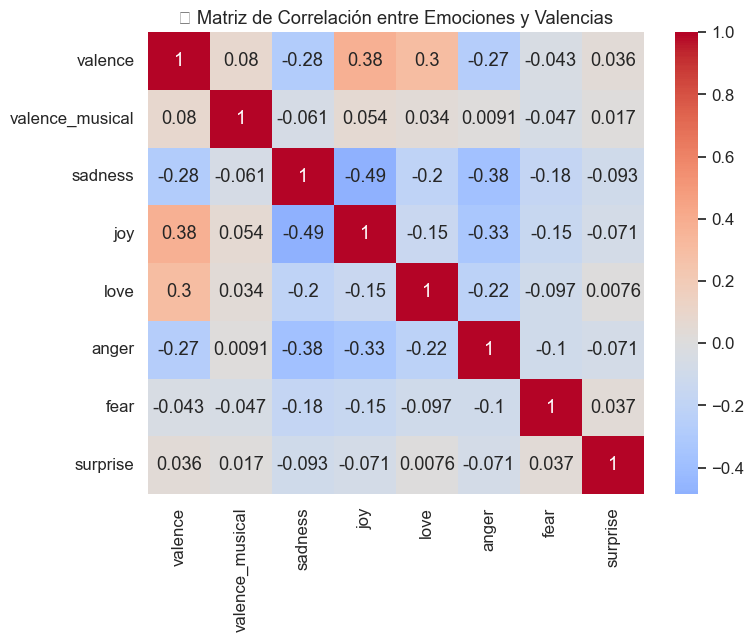

In [9]:
variables_corr = ['valence', 'valence_musical'] + emociones_cols
corr_matrix = canciones_total[variables_corr].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("🔗 Matriz de Correlación entre Emociones y Valencias")
plt.show()


/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/259340852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/259340852.py:14: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jesussalgado/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


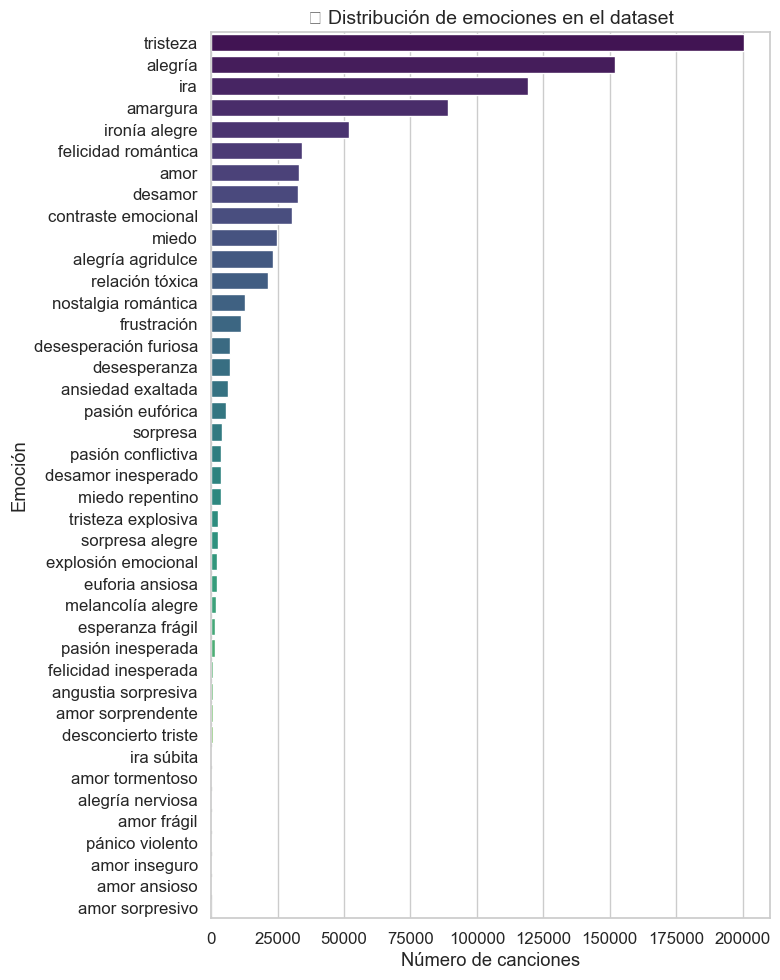

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))  # ← altura mayor para más espacio
sns.countplot(
    data=canciones_total,
    y='emocion_label',                  # ← Y en vez de X para gráfico horizontal
    order=canciones_total['emocion_label'].value_counts().index,  # ← ordenado por frecuencia
    palette='viridis'
)
plt.title("🎭 Distribución de emociones en el dataset", fontsize=14)
plt.xlabel("Número de canciones")
plt.ylabel("Emoción")
plt.tight_layout()
plt.show()


/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/1264721805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/1264721805.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jesussalgado/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


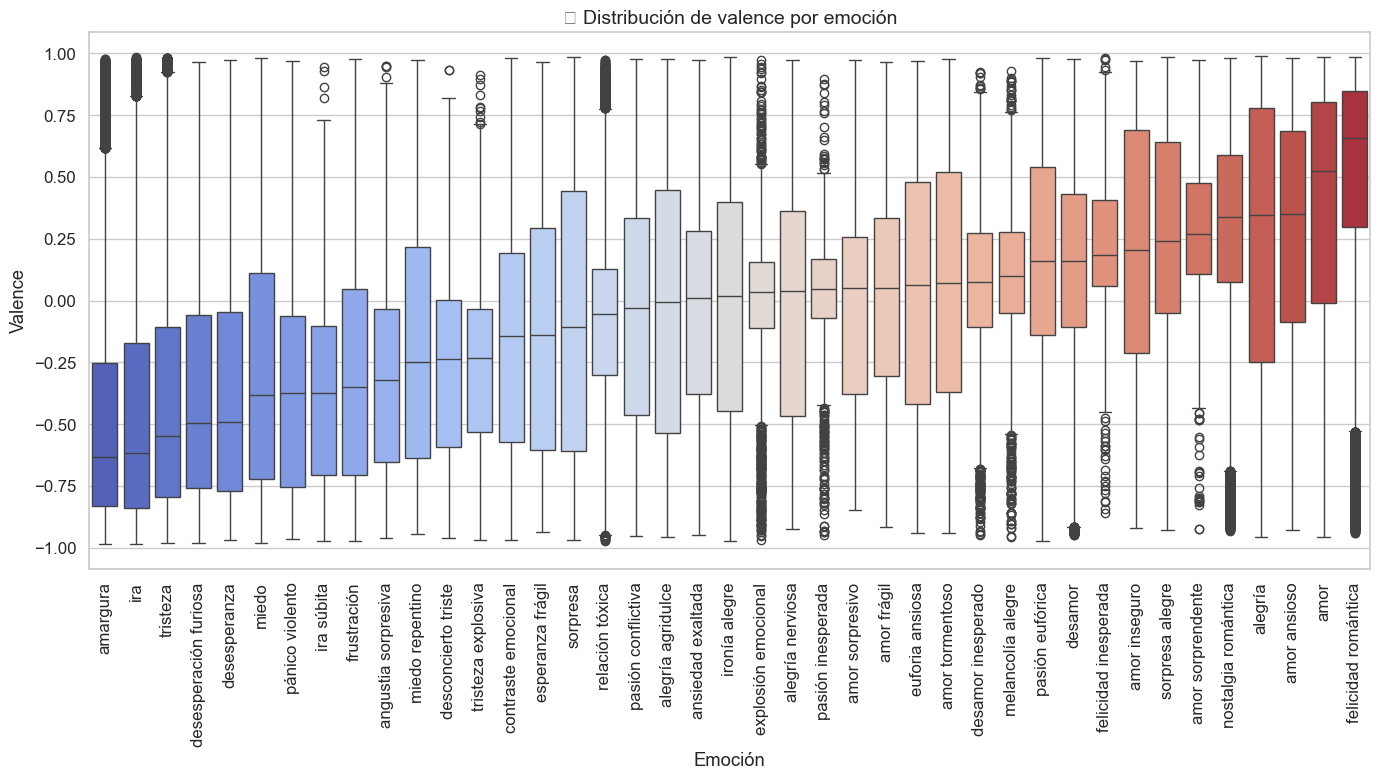

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=canciones_total,
    x='emocion_label',
    y='valence',
    order=canciones_total.groupby('emocion_label')['valence'].median().sort_values().index,
    palette='coolwarm'
)
plt.title("📊 Distribución de valence por emoción", fontsize=14)
plt.xticks(rotation=90)  # rotar etiquetas si es necesario
plt.xlabel("Emoción")
plt.ylabel("Valence")
plt.tight_layout()
plt.show()


/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/295352732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/295352732.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jesussalgado/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


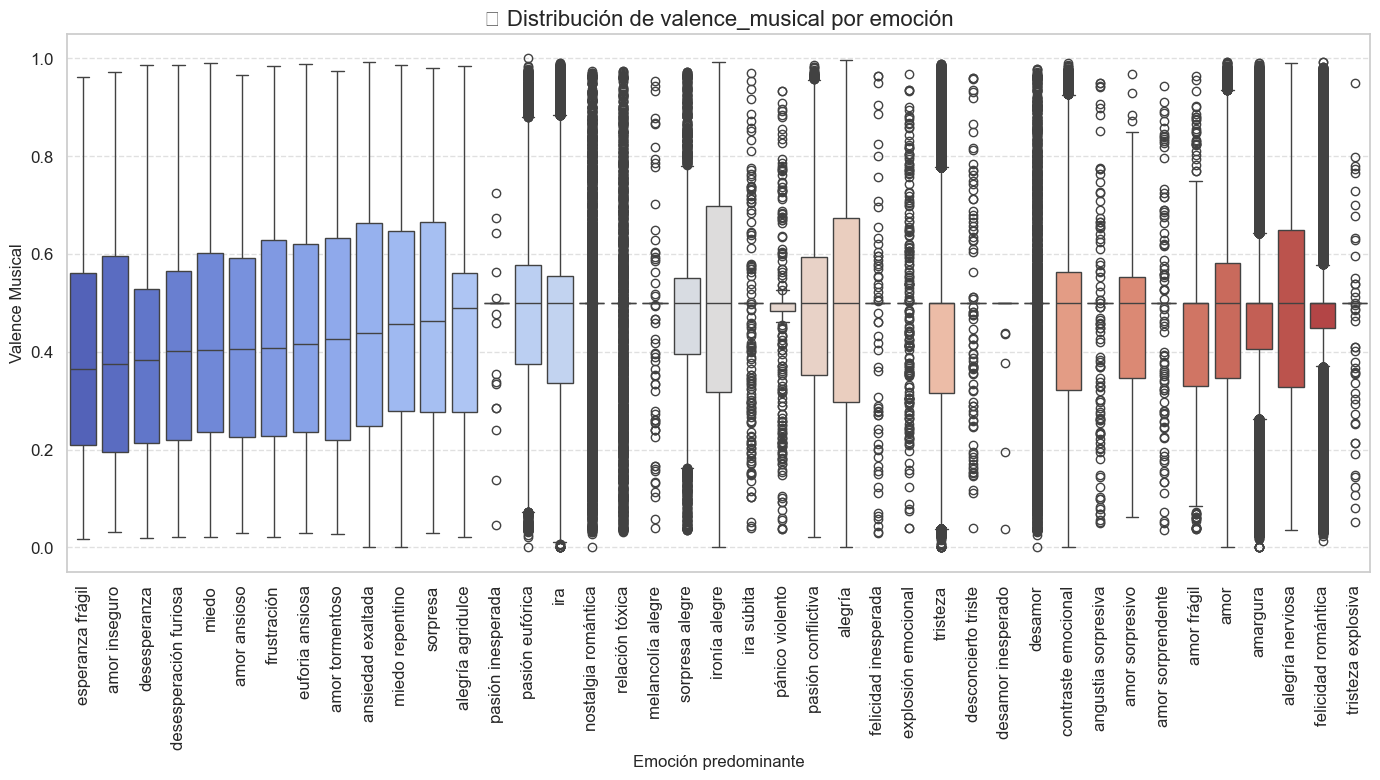

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.boxplot(
    data=canciones_total,
    x='emocion_label',
    y='valence_musical',  # 👈 aquí cambiamos a valence_musical
    order=canciones_total.groupby('emocion_label')['valence_musical'].median().sort_values().index,
    palette='coolwarm'
)

plt.title("📊 Distribución de valence_musical por emoción", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Emoción predominante", fontsize=12)
plt.ylabel("Valence Musical", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/1112085686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/1112085686.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jesussalgado/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


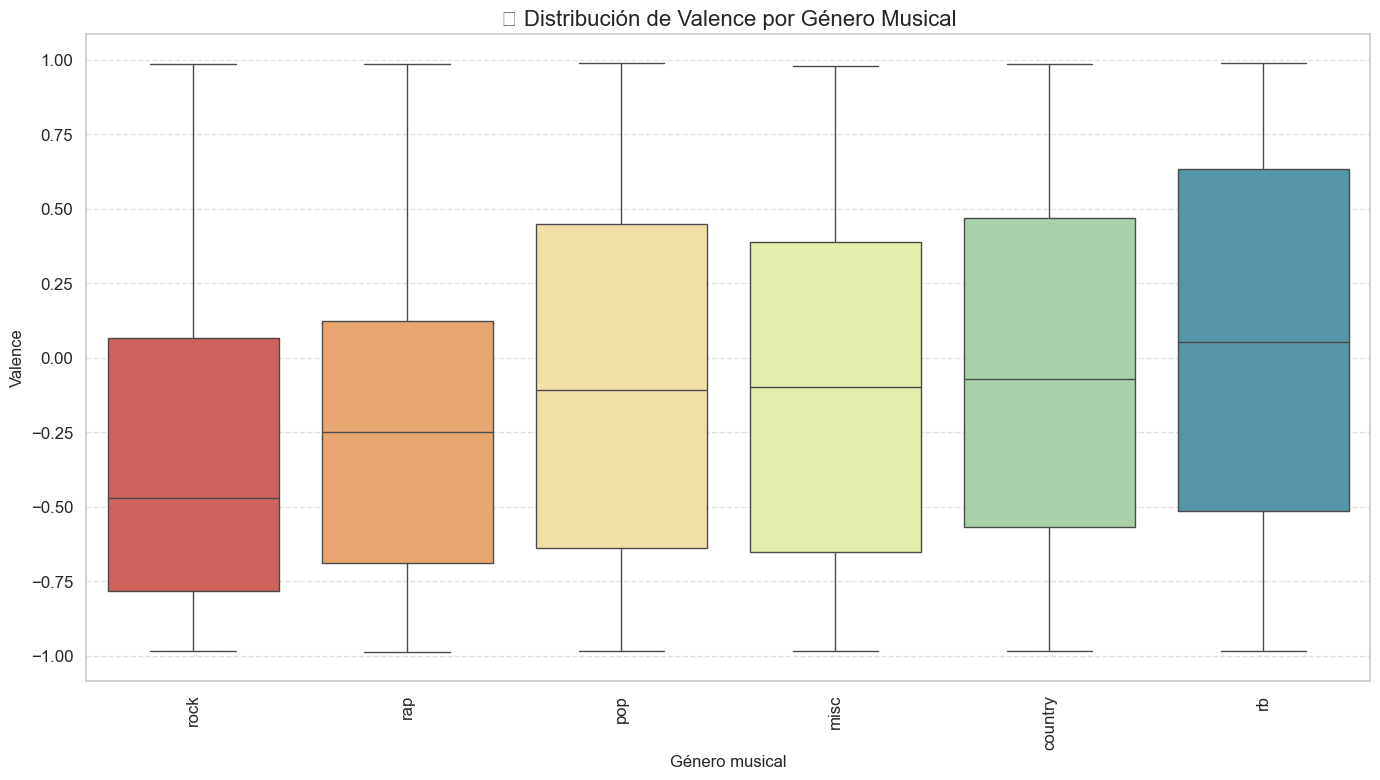

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

sns.boxplot(
    data=canciones_total,
    x='tag',
    y='valence',
    order=canciones_total.groupby('tag')['valence'].median().sort_values().index,
    palette='Spectral'
)

plt.title("📊 Distribución de Valence por Género Musical", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Género musical", fontsize=12)
plt.ylabel("Valence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/1144894360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/fc/rj80px2x7xv_tx8z15qw98gh0000gn/T/ipykernel_6955/1144894360.py:16: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jesussalgado/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


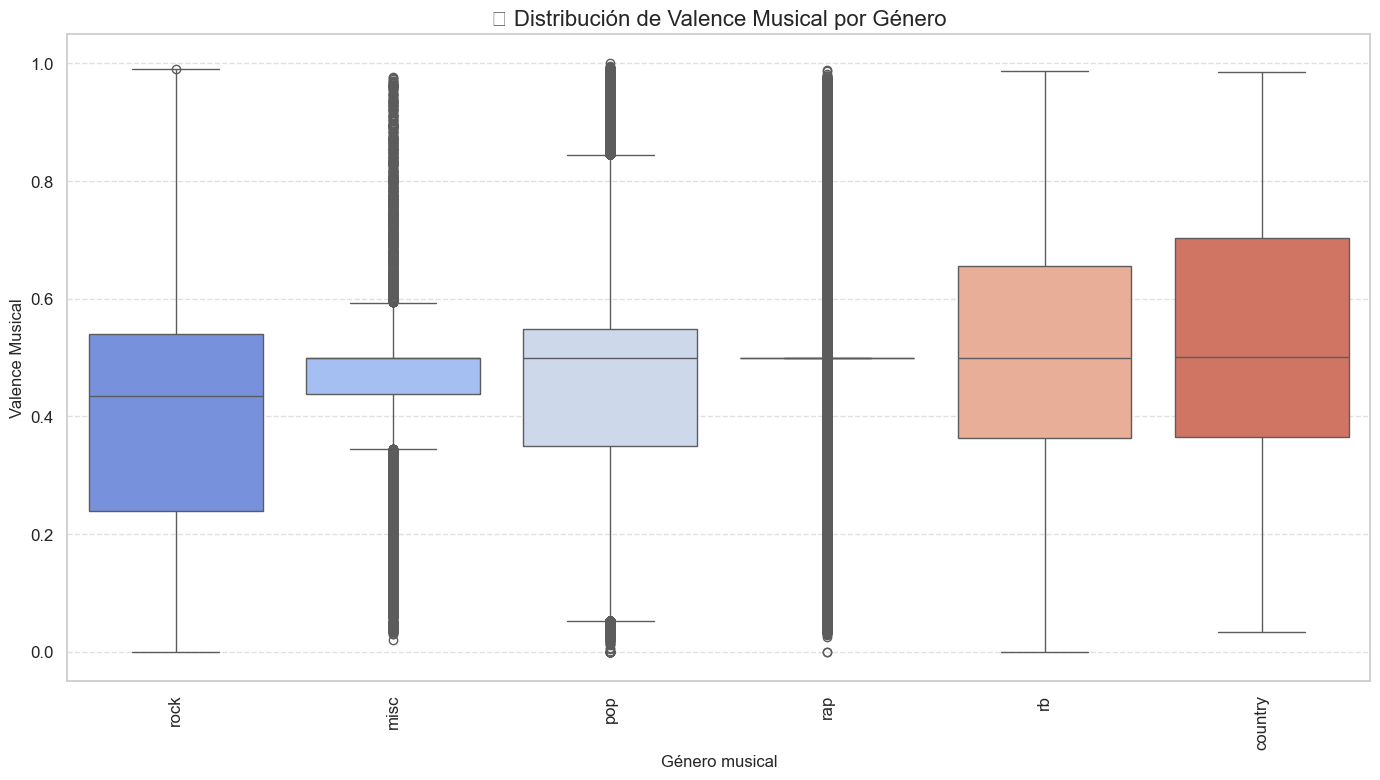

In [15]:
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=canciones_total,
    x='tag',
    y='valence_musical',
    order=canciones_total.groupby('tag')['valence_musical'].median().sort_values().index,
    palette='coolwarm'
)

plt.title("🎶 Distribución de Valence Musical por Género", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Género musical", fontsize=12)
plt.ylabel("Valence Musical", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
